<a href="https://colab.research.google.com/github/shubhamgautam1211/Machine-Learning-Standalone/blob/main/SG_16_DecisionTree_speedDating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn import svm
from statistics import mean
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("speeddating.csv")
data1=data.copy()
dummy=pd.get_dummies(data1.gender)
data1 = pd.concat([data1,dummy], axis=1)
data1.drop('gender', axis=1, inplace=True)
data1

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,...,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female,male
0,0,1,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,5,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6,8,8,8,8,6,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15,20,...,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0,1,0
1,0,1,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,10,7,7,5,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15,20,...,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0,1,0
2,1,1,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,12,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10,10,10,10,10,10,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15,20,...,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1,1,0
3,0,1,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,5,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7,8,9,8,9,8,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,...,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1,1,0
4,0,1,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],Law,30,10,20,10,10,20,[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],8,7,9,6,9,7,[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],15,20,...,10,10,9,8,1,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.21,[0-0.33],3,2,4,[0-4],[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,25,26,1,[0-1],European/Caucasian-American,'Latino/Hispanic American',0,1,1,[0-1],[0-1],'Climate Dynamics',10,10,30,20,10,15,[0-15],[0-15],[21-100],[16-20],[0-15],[0-15],10,5,3,2,6,5,[9-10],[0-5],[0-5],[0-5],[6-8],[0-5],70,0,...,9,10,10,7,3,[6-8],[0-5],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],0.64,[0.33-1],10,?,3,[7-10],[0-3],[3-5],2,5,[0-5],[5-6],0,0,1,0,0,1
8374,1,21,25,24,1,[0-1],European/Caucasian-Amer

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 124 entries, has_null to male
dtypes: int64(7), object(115), uint8(2)
memory usage: 7.8+ MB


### **Some features are having range values like [num1, num2]. Process them**
### **by take average**
### **value of num1 and num2**

In [ ]:
import re


list1 =[]
cols=data1.columns[5:6].tolist()+data1.columns[11:13].tolist()+data1.columns[20:26].tolist()+data1.columns[32:38].tolist()+data1.columns[89:106].tolist()+data1.columns[107:108].tolist()+data1.columns[111:114].tolist()+data1.columns[116:118].tolist()
for col in cols:
  for i in range(data1.shape[0]):
    list1.append(re.findall('\d+', data1[col][i]))
    data1[col][i]=int((int(list1[i][0])+int(list1[i][1]))/2)
  list1.clear()

  
data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,...,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female,male
0,0,1,21,27,6,5,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,3,3,Law,35,20,20,20,0,5,60,18,18,18,7,7,6,8,8,8,8,6,7,7,7,7,7,7,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.14,0,3,2,4,2,1,4,7,6,7,5,0,1,0,0,1,0
1,0,1,21,22,1,0,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,3,3,Law,60,0,0,40,0,0,60,7,7,60,7,7,7,8,10,7,7,5,7,7,9,7,7,2,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.54,16,3,2,4,2,1,4,7,5,7,5,1,1,0,0,1,0
2,1,1,21,22,1,0,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,3,3,Law,19,18,19,18,14,12,18,18,18,18,7,7,10,10,10,10,10,10,9,9,9,9,9,9,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.16,0,3,2,4,2,1,4,7,?,7,2,1,1,1,1,1,0
3,0,1,21,23,2,2,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,3,3,Law,30,5,15,40,5,5,60,7,7,60,7,7,7,8,9,8,9,8,7,7,9,7,9,7,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.61,16,3,2,4,2,1,4,7,6,7,5,0,1,1,1,1,0
4,0,1,21,24,3,2,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,3,3,Law,30,10,20,10,10,20,60,7,18,7,7,18,8,7,9,6,9,7,7,7,9,7,9,7,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.21,0,3,2,4,2,1,4,6,6,7,5,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,25,26,1,0,European/Caucasian-American,'Latino/Hispanic American',0,1,1,0,0,'Climate Dynamics',10,10,30,20,10,15,7,7,60,18,7,7,10,5,3,2,6,5,9,2,2,2,7,2,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,0.64,16,10,?,3,8,1,4,2,5,2,5,0,0,1,0,0,1
8374,1,21,25,24,1,0,European/Caucasian-American,Other,0,1,1,0,0,'Climate Dynamics',50,20,10,5,10,5,60,18,7,7,7,7,6,3,7,3,7,2,7,2,7,2,7,2,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,0.71,16,10,?,3,8,1,4,4,4,2,2,0,0,0,0,0,1
8375,1,21,25,29,4,5,European/Caucasian-American,'Latino/Hispanic American',0,1,1,0,0,'Climate Dynamics',40,10,30,10,10,?,60,7,60,7,7,7,2,1,2,2,2,1,2,2,2,2,2,2,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,-0.46,0,10,?,3,8,1,4,6,5,7,5,0,0,0,0,0,1
8376,1,21,25,22,3,2,European/Caucasian-American,'Asian/Pacific Islander/Asian-American',0,1,1,0,0,'Climate Dynamics',10,25,25,10,10,20,7,60,60,7,7,18,5,7,5,5,3,6,2,7,2,2,2,7,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,0.62,16,10,?,3,8,1,4,5,5,2,5,0,0,1,0,0,1


In [ ]:
for col in cols:  #convert object into integers
  data1[col] = data1[col].astype(int)

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 124 entries, has_null to male
dtypes: int64(45), object(77), uint8(2)
memory usage: 7.8+ MB


Features such as ‘race’ and ‘race_o’ contain multiple nominal values. This 
cannot be processed directly using the one hot encoding. Hence find the 
unique values in that column and create “multi hot encoding” 

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
multi_hot = MultiLabelBinarizer()
data1["race"]=multi_hot.fit_transform(data1["race"])
data1["race_o"]=multi_hot.fit_transform(data1["race_o"])

data1

,has_null,wave,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,...,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,female,male
0,0,1,21,27,6,5,1,0,0,2,4,3,3,Law,35,20,20,20,0,5,60,18,18,18,7,7,6,8,8,8,8,6,7,7,7,7,7,7,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.14,0,3,2,4,2,1,4,7,6,7,5,0,1,0,0,1,0
1,0,1,21,22,1,0,1,0,0,2,4,3,3,Law,60,0,0,40,0,0,60,7,7,60,7,7,7,8,10,7,7,5,7,7,9,7,7,2,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.54,16,3,2,4,2,1,4,7,5,7,5,1,1,0,0,1,0
2,1,1,21,22,1,0,1,1,1,2,4,3,3,Law,19,18,19,18,14,12,18,18,18,18,7,7,10,10,10,10,10,10,9,9,9,9,9,9,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.16,0,3,2,4,2,1,4,7,?,7,2,1,1,1,1,1,0
3,0,1,21,23,2,2,1,0,0,2,4,3,3,Law,30,5,15,40,5,5,60,7,7,60,7,7,7,8,9,8,9,8,7,7,9,7,9,7,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.61,16,3,2,4,2,1,4,7,6,7,5,0,1,1,1,1,0
4,0,1,21,24,3,2,1,1,0,2,4,3,3,Law,30,10,20,10,10,20,60,7,18,7,7,18,8,7,9,6,9,7,7,7,9,7,9,7,15,20,...,10,10,9,8,1,9,2,7,9,2,2,2,2,2,7,9,2,9,9,9,7,2,0.21,0,3,2,4,2,1,4,6,6,7,5,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,25,26,1,0,0,1,0,1,1,0,0,'Climate Dynamics',10,10,30,20,10,15,7,7,60,18,7,7,10,5,3,2,6,5,9,2,2,2,7,2,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,0.64,16,10,?,3,8,1,4,2,5,2,5,0,0,1,0,0,1
8374,1,21,25,24,1,0,0,0,0,1,1,0,0,'Climate Dynamics',50,20,10,5,10,5,60,18,7,7,7,7,6,3,7,3,7,2,7,2,7,2,7,2,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,0.71,16,10,?,3,8,1,4,4,4,2,2,0,0,0,0,0,1
8375,1,21,25,29,4,5,0,1,0,1,1,0,0,'Climate Dynamics',40,10,30,10,10,?,60,7,60,7,7,7,2,1,2,2,2,1,2,2,2,2,2,2,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,-0.46,0,10,?,3,8,1,4,6,5,7,5,0,0,0,0,0,1
8376,1,21,25,22,3,2,0,1,0,1,1,0,0,'Climate Dynamics',10,25,25,10,10,20,7,60,60,7,7,18,5,7,5,5,3,6,2,7,2,2,2,7,70,0,...,9,10,10,7,3,7,2,2,9,9,9,7,2,9,7,2,7,9,9,9,7,2,0.62,16,10,?,3,8,1,4,5,5,2,5,0,0,1,0,0,1


## **Data Splitting**

In [ ]:
x = data1.loc[:, data1.columns != "match"]
y = data1.loc[:, data1.columns == "match"]

print(x.shape)
print(y.shape)

(8378, 123)
(8378, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=41)

In [ ]:
X_train=X_train.select_dtypes(exclude=['object'])         #removing undesirable objects 
X_test=X_test.select_dtypes(exclude=['object'])

## **Decision tree modelling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

model = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Confusion Matrix : ")
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
print(cf_matrix)

print("------------------------------------------------")

print("Precision Score : ")
print(precision_score(y_test, model.predict(X_test), average='micro'))

print("------------------------------------------------")

print("Recall Score : ")
print(recall_score(y_test, model.predict(X_test), average='micro'))

print("------------------------------------------------")

print("F1 Score : ")
print(f1_score(y_test, model.predict(X_test), average='micro'))

Confusion Matrix : 
[[2101    0]
 [   0  413]]
------------------------------------------------
Precision Score : 
1.0
------------------------------------------------
Recall Score : 
1.0
------------------------------------------------
F1 Score : 
1.0


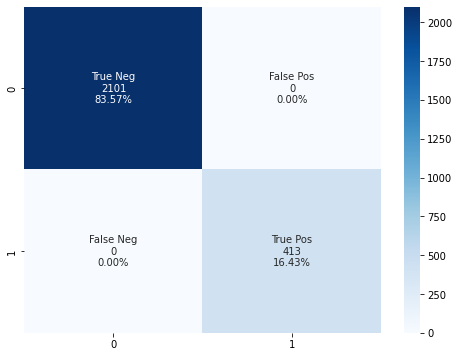

In [ ]:
plt.figure(figsize=(8,6))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='',cmap = "Blues")

## **Playing with Trees**

In [ ]:
model=DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=5,min_samples_split=3,min_weight_fraction_leaf=0.3,max_features="sqrt").fit(X_train,y_train)

model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.3, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Confusion Matrix : ")
cf_matrix = confusion_matrix(y_test, model.predict(X_test))
print(cf_matrix)

print("------------------------------------------------")

print("Precision Score : ")
print(precision_score(y_test, model.predict(X_test), average='micro'))

print("------------------------------------------------")

print("Recall Score : ")
print(recall_score(y_test, model.predict(X_test), average='micro'))

print("------------------------------------------------")

print("F1 Score : ")
print(f1_score(y_test, model.predict(X_test), average='micro'))

Confusion Matrix : 
[[2101    0]
 [ 413    0]]
------------------------------------------------
Precision Score : 
0.835719968178202
------------------------------------------------
Recall Score : 
0.835719968178202
------------------------------------------------
F1 Score : 
0.835719968178202
